# **이변량분석 : 숫자 vs 숫자**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용
> ① 타이타닉 생존자  
② 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


----

## **2.시각화 : 산점도**

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **'직선'(Linearity)** 입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_ex.png?raw=true' width=500/>

### **(1) 산점도**

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름)

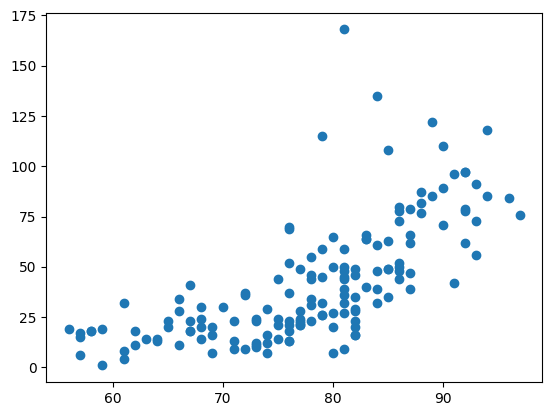

In [4]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

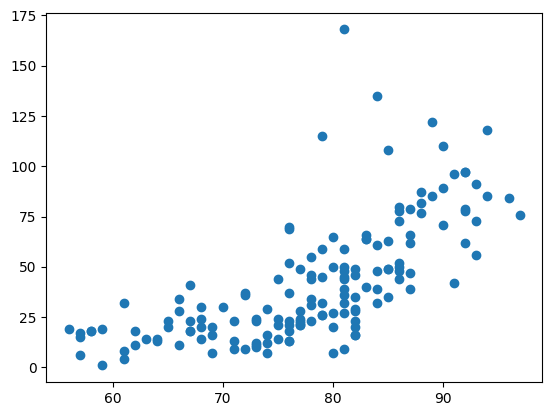

In [5]:
plt.scatter('Temp', 'Ozone', data = air)
plt.show()

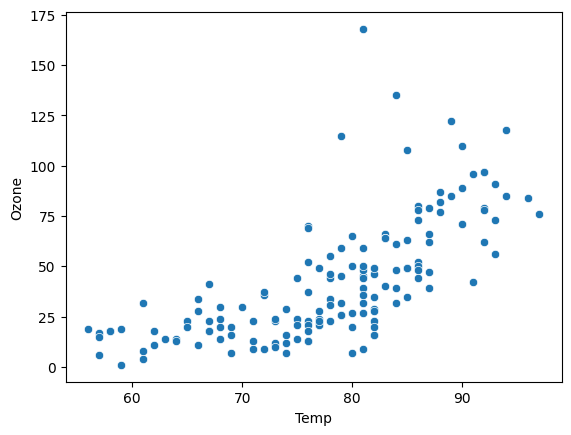

In [6]:
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

In [ ]:
""" 온도와 오존 간의 양의 증가추세가 나타나고 있다. 이상치로 추정되는 데이터 값들이 존재한다. """

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

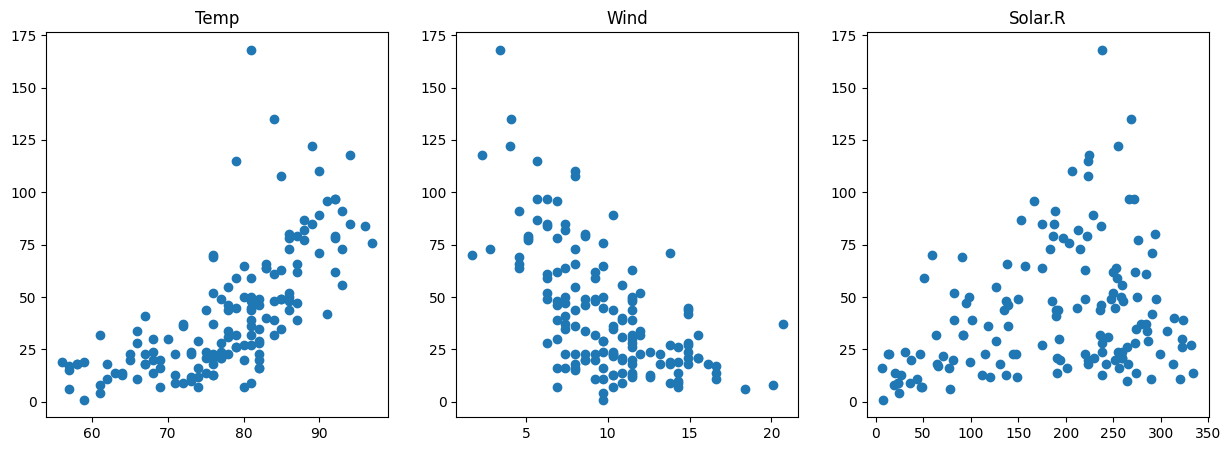

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Temp')
plt.scatter('Temp', 'Ozone', data = air)

plt.subplot(1, 3, 2)
plt.title('Wind')
plt.scatter('Wind', 'Ozone', data = air)

plt.subplot(1, 3, 3)
plt.title('Solar.R')
plt.scatter('Solar.R', 'Ozone', data = air)

* [문2] Ozone과 가장 강한 관계의 x변수는?

In [ ]:
""" 
눈으로 데이터를 확인하는 경우: 전체적인 추세에 가깝게 점들이 밀집되어 있는 Temp(온도)가 가장 Ozone가 강한 상관관계를 보인다.

"""

* 두 변수의 관계
    * 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있습니다.
    * 특히, 직선의 패턴이 보인다면

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800/>

### **(2) pairplot 한꺼번에 시각화**

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

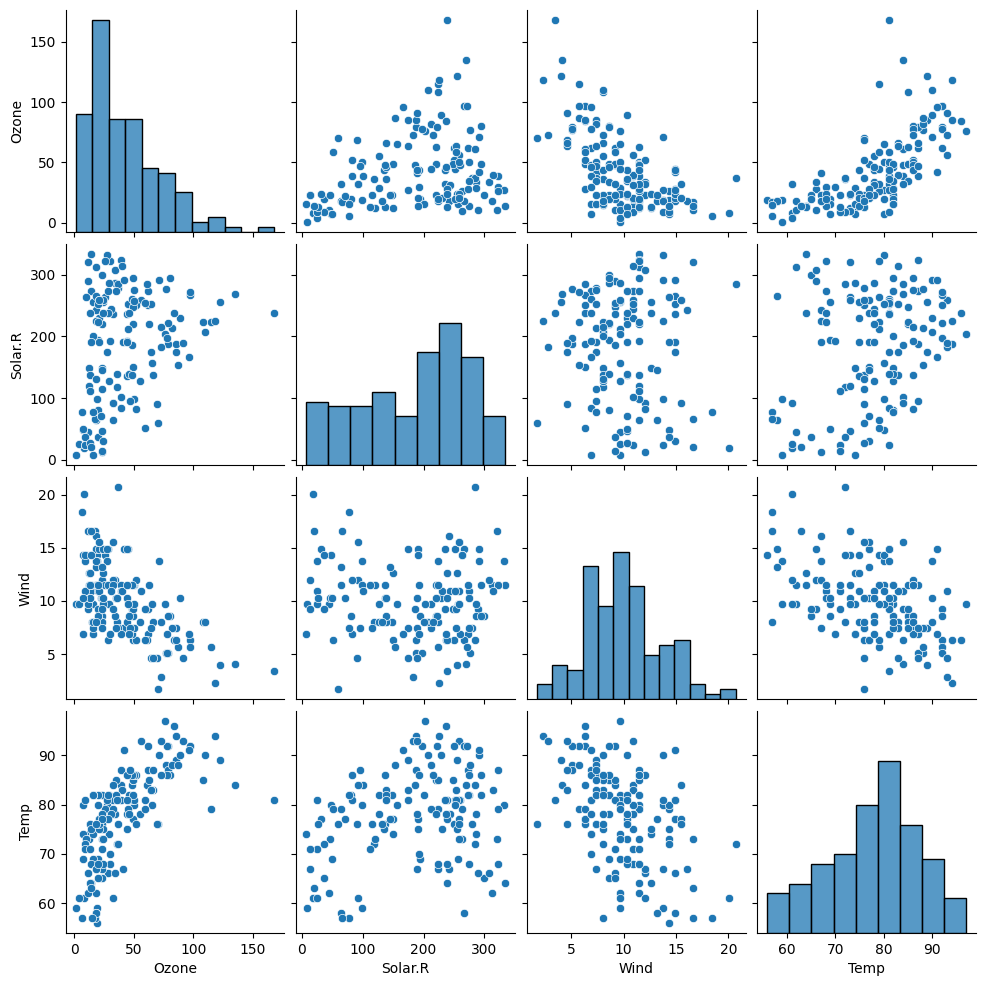

In [14]:
sns.pairplot(air)
plt.show()

###  **(3) (추가) jointplot, regplot**

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

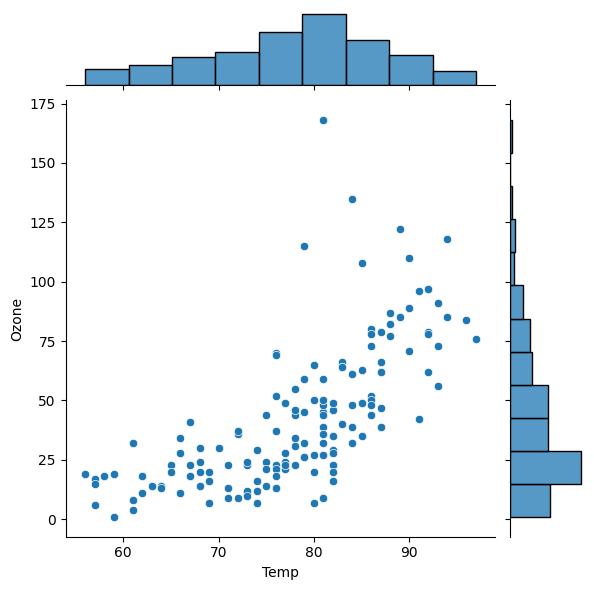

In [15]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

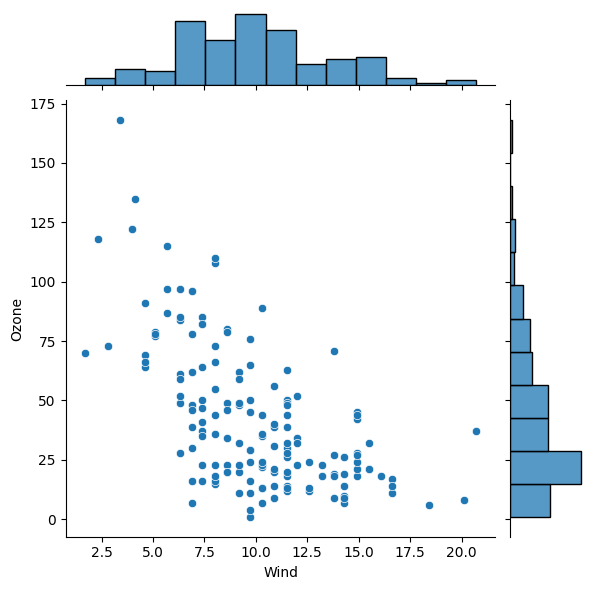

In [16]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

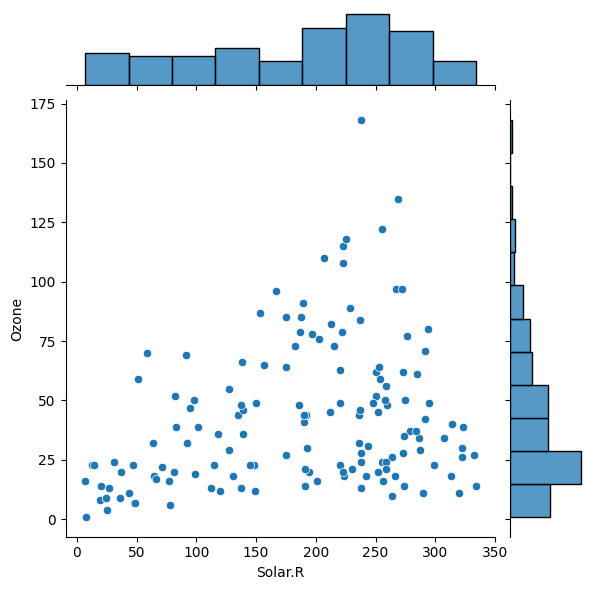

In [17]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

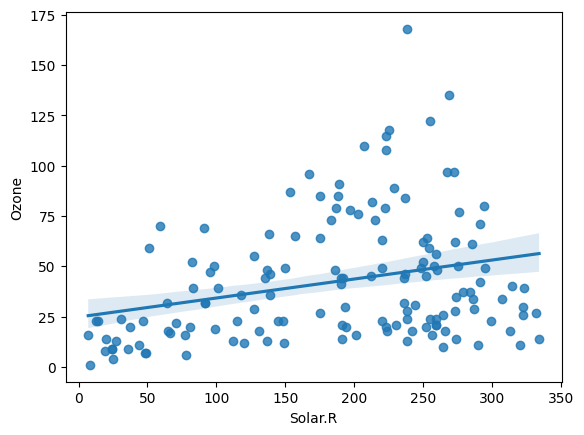

In [18]:
sns.regplot(x='Solar.R', y='Ozone', data = air)
plt.show()

## **3.수치화 : 상관분석**

### (1) 상관계수, p-value

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
    

In [19]:
import scipy.stats as spst

In [ ]:
# 상관계수와 p-value
spst.pearsonr(air['Temp'], air['Ozone'])

# 상관계수 r: 약 0.68로 강한 상관관계인 편이다.
# p-value: 유의수준의 값은 약 2.19 * 10^-22로 매우 작은 값이다

PearsonRResult(statistic=np.float64(0.6833717861490115), pvalue=np.float64(2.19776980020031e-22))

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

### **(2) 데이터프레임 한꺼번에 상관계수 구하기**

In [ ]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

# 상관계수 중 그 절댓값이 가장 강한 pair는 Temp-Ozone

,Ozone,Solar.R,Wind,Temp,Date
Ozone,1.000000,0.280068,-0.605478,0.683372,0.170271
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.104682
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.168683
Temp,0.683372,0.275840,-0.457988,1.000000,0.385605
Date,0.170271,-0.104682,-0.168683,0.385605,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계

### **(3) (추가) 상관계수를 heatmap으로 시각화**

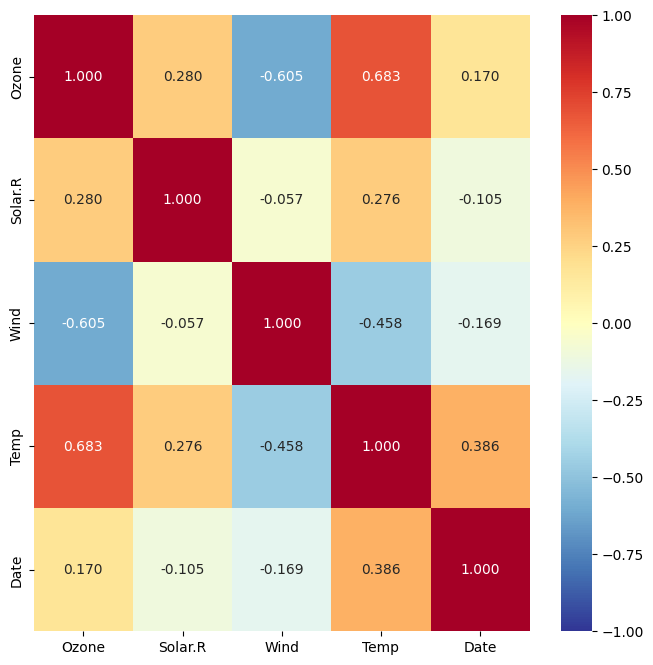

In [22]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

칼라를 변경하려면 아래 링크로 가서 color map 을 확인하고 조정하세요.  
cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* 다음의 변수에 대해서 상관분석을 수행하시오.

* [문1] Temp --> Ozone

In [25]:
temp_ozone = spst.pearsonr(air['Temp'], air['Ozone'])
print(f"상관계수: {temp_ozone[0]}, p-value: {temp_ozone[1]}")

상관계수: 0.6833717861490115, p-value: 2.19776980020031e-22


* [문2] Wind --> Ozone

In [26]:
wind_ozone = spst.pearsonr(air['Wind'], air['Ozone'])
print(f"상관계수: {wind_ozone[0]}, p-value: {wind_ozone[1]}")

상관계수: -0.6054782354684076, p-value: 1.1255146087638106e-16


* [문3] Solar.R --> Ozone
    * 단, Solar.R 에는 NaN이 있습니다. NaN을 제외(.notnull())하고, 상관분석을 수행하시오.

In [27]:
solar_r_ozone = spst.pearsonr(air['Solar.R'].notnull(), air['Ozone'])
print(f"상관계수: {solar_r_ozone[0]}, p-value: {solar_r_ozone[1]}")

상관계수: 0.048252816250366565, p-value: 0.553646462655347


## **4.복습문제**

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

* **변수설명**
> * **medv**  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== **Target**
> * **crim** :	범죄율
> * **zn** :	25,000 평방피트를 초과 거주지역 비율
> * **indus** :	비소매상업지역 면적 비율
> * **chas** :	찰스강변 위치(범주 : 강변1, 아니면 0)
> * **nox** :	일산화질소 농도
> * **rm** :	주택당 방 수
> * **age** :	1940년 이전에 건축된 주택의 비율
> * **dis** :	직업센터의 거리
> * **rad** :	방사형 고속도로까지의 거리
> * **tax** :	재산세율
> * **ptratio** :	학생/교사 비율
> * **lstat** :	인구 중 하위 계층 비율


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [ ]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


* 1) crim(범죄율) --> mdev(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

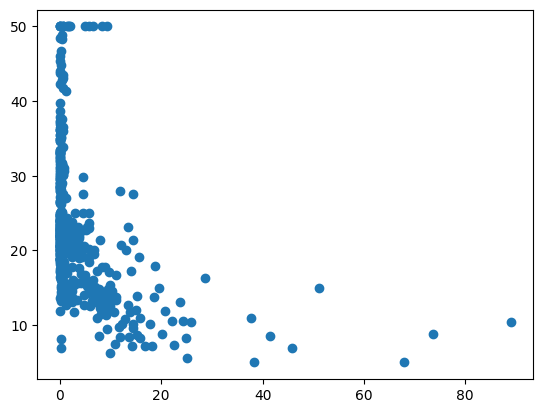

In [ ]:
plt.scatter(x = 'crim', y = 'medv', data=boston)

# 대체로 범죄율이 매우 낮은 곳에 값들이 몰려 있고, 범죄율이 높아짐에 따라 집값이 극단적으로 떨어지는 반비례 추세

In [41]:
crim_medv_tuple = spst.pearsonr(boston['crim'], boston['medv'])
print(f"상관계수 r: {crim_medv_tuple[0]}, 유의수준 p-value: {crim_medv_tuple[1]}")

상관계수 r: -0.38830460858681154, 유의수준 p-value: 1.1739870821943559e-19


In [42]:
""" 
상관계수의 절댓값은 약 0.39로 높은 편은 아니지만, 범죄율 값이 특정 영역에 지나치게 몰려 있으므로
상관계수 이외의 설명 방법도 같이 확인하면 좋을 것 같다.
"""

' \n상관계수의 절댓값은 약 0.39로 높은 편은 아니지만, 범죄율 값이 특정 영역에 지나치게 몰려 있으므로\n상관계수 이외의 설명 방법도 같이 확인하면 좋을 것 같다.\n'

* 2) tax(제산세율) --> mdev(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

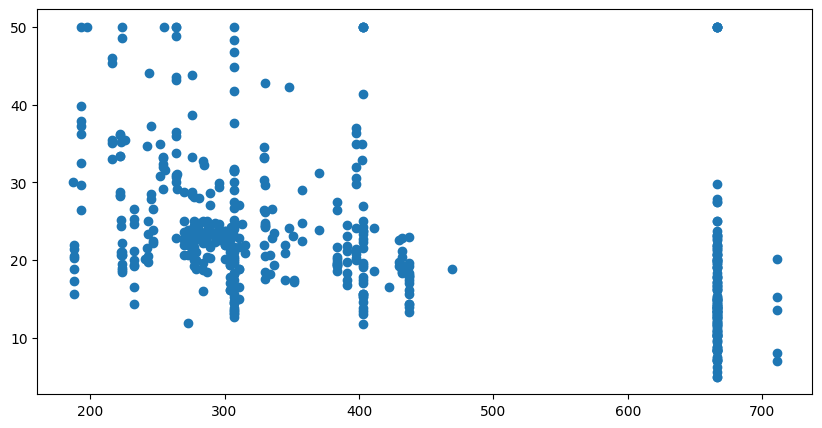

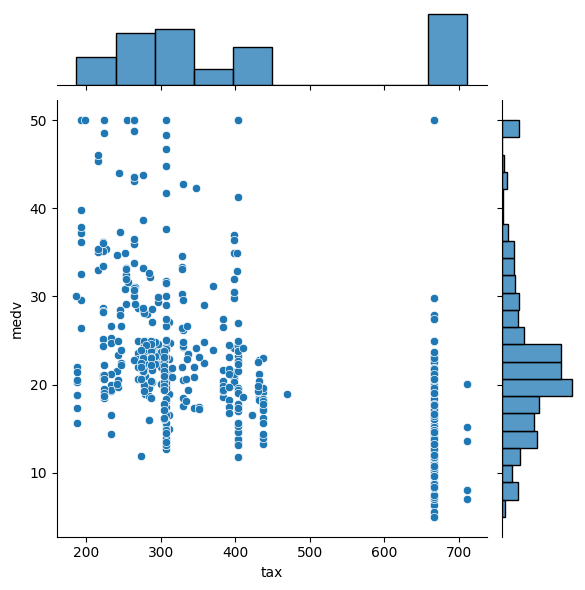

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x = 'tax', y = 'medv', data=boston)

sns.jointplot(x = 'tax', y = 'medv', data=boston)
'''
전체는 아니지만, 다수의 집에서 재산세율은 특정한 임계치로 설정되어 있다.

전체 자료가 하나의 선형 관계로 나타나지 않고, x축 값이 같은 값이 많아 눈으로 값들의 분포를 확인하기 힘드므로
jointplot을 같이 확인할 필요가 있다.
'''

In [ ]:
tax_medv_tuple = spst.pearsonr(boston['tax'], boston['medv'])
print(f"상관계수 r: {tax_medv_tuple[0]}, 유의수준 p-value: {tax_medv_tuple[1]}")



상관계수 r: -0.46853593356776707, 유의수준 p-value: 5.63773362769063e-29


* 3) lstat(하위계층비율) --> mdev(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

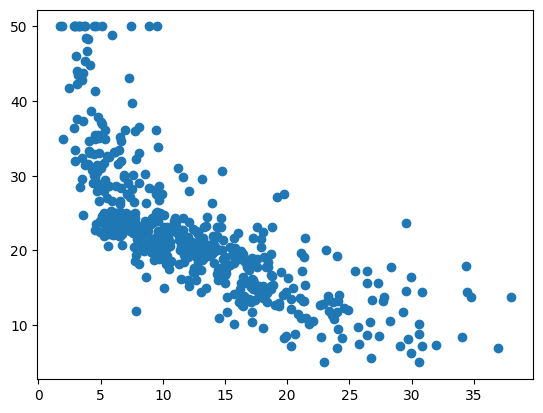

In [ ]:
plt.scatter('lstat', 'medv', data = boston)

'''
하위계층 비율과 집값은 음의 관계를 가진다.
하위 계층이 많을수록 집값이 감소한다.
'''

In [ ]:
lstat_medv_tuple = spst.pearsonr(boston['lstat'], boston['medv'])
print(f"상관계수 r: {lstat_medv_tuple[0]}, 유의수준 p-value: {lstat_medv_tuple[1]}")

'''
하위계층 비율과 집값의 상관계수의 절댓값은 0.73으로 상당히 높은 값이고, 강력한 상관관계라고 할 수 있다.
하위계층 비율은 집값에 강력하게 영향을 미치는 feature 중 하나라고 추론할 수 있다.
'''

상관계수 r: -0.7376627261740148, 유의수준 p-value: 5.081103394387441e-88


* 4) 전체 변수들끼리의 상관계수를 구하고, 가장 강한 상관관계와 가장 약한 상관관계를 찾아 봅시다.

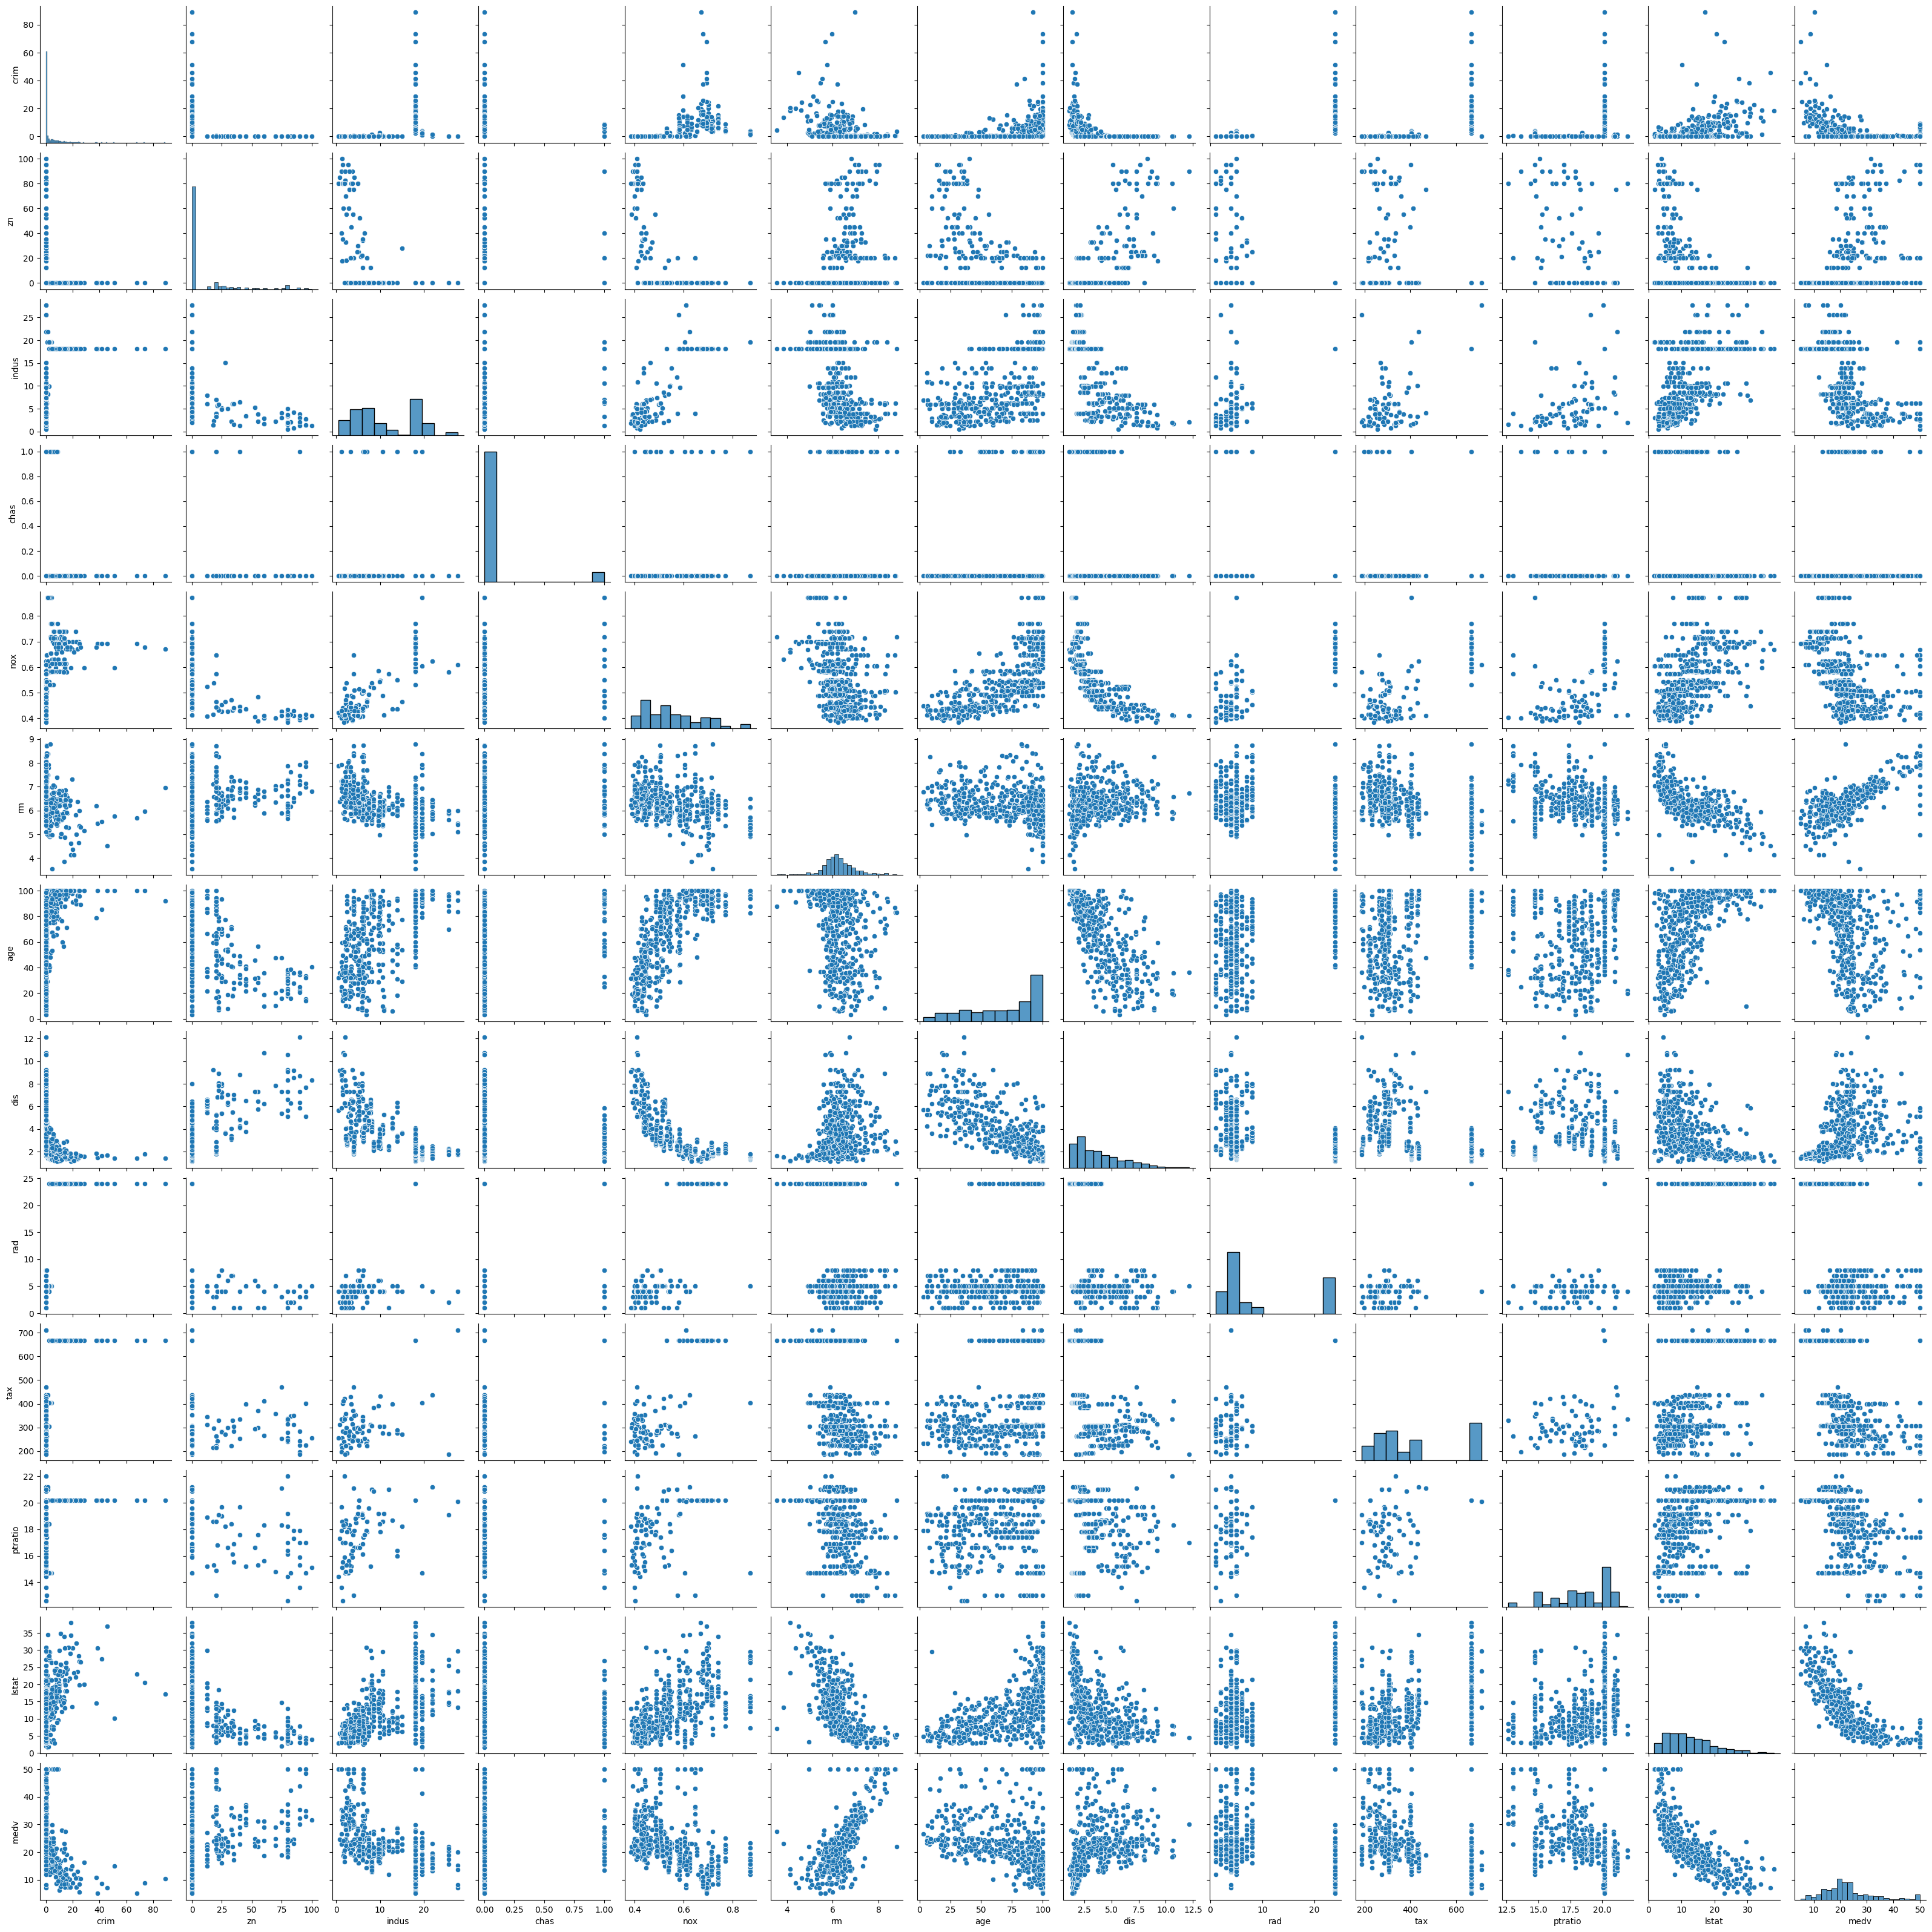

In [54]:
sns.pairplot(boston)

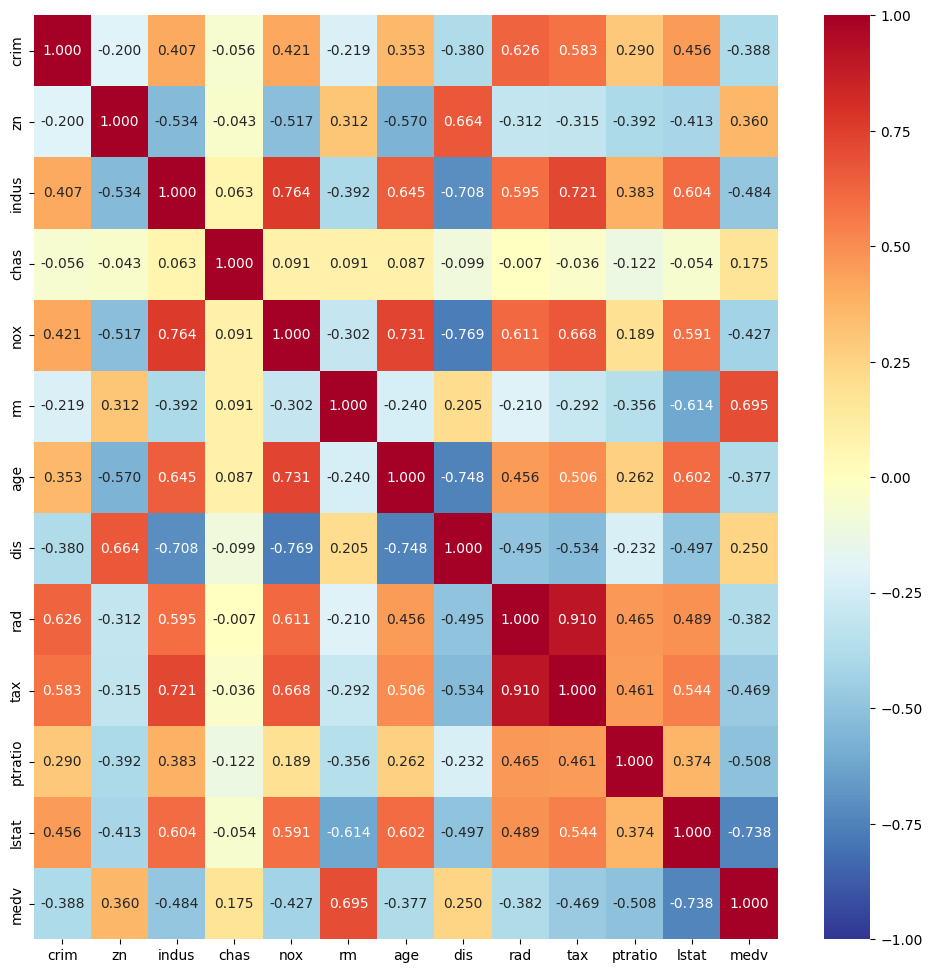

In [56]:
plt.figure(figsize = (12, 12))
sns.heatmap(boston.corr(),
            annot = True,
            fmt = '.3f',
            cmap = 'RdYlBu_r',
            vmin = -1, vmax = 1)
plt.show()

In [75]:
pearsonr_df = boston.corr()
max_r_values = []
for row, col in pearsonr_df.iterrows():
    abs_col = abs(col).drop(row)
    max_r_values.append((row, abs_col.idxmax(), abs_col.max()))

for r_value in max_r_values:
    print(f"{r_value[0]}와 가장 높은 상관관계인 열: {r_value[1]} -> {r_value[2]:.3f}")

crim와 가장 높은 상관관계인 열: rad -> 0.626
zn와 가장 높은 상관관계인 열: dis -> 0.664
indus와 가장 높은 상관관계인 열: nox -> 0.764
chas와 가장 높은 상관관계인 열: medv -> 0.175
nox와 가장 높은 상관관계인 열: dis -> 0.769
rm와 가장 높은 상관관계인 열: medv -> 0.695
age와 가장 높은 상관관계인 열: dis -> 0.748
dis와 가장 높은 상관관계인 열: nox -> 0.769
rad와 가장 높은 상관관계인 열: tax -> 0.910
tax와 가장 높은 상관관계인 열: rad -> 0.910
ptratio와 가장 높은 상관관계인 열: medv -> 0.508
lstat와 가장 높은 상관관계인 열: medv -> 0.738
medv와 가장 높은 상관관계인 열: lstat -> 0.738
